<a href="https://colab.research.google.com/github/devorahst/Cardiac-Arrest-Visualization/blob/main/AnovaExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANOVA**
In this walkthrough, we will go over an example of using ANOVA to establish association between two of the features from our SAK datset. We will be using the feature 'Age', and our dependent variable, 'CODISNDISeligibleProfile'. 

# Part 1. Set-Up
First, we must download the dataset. Upon running the cell, you will be prompted to login to your Gmail account. You will then be provided with a one-time use code to copy and paste into the slot below. After hitting enter, the dataset will load into this script.

*See [IO Notebook](https://colab.research.google.com/drive/1fuF8iahEqBFV62Y6OoiEViUqHo-DbXrT) for more information about set-up and interacting with our dataset

In [ ]:
#pulls up our SAK dataset
#@title Upload Dataset
file_id = "13DLmmbYXonl9alHR4VobfeTuA_IxlQxZ" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!pip install -U scikit-learn

from scipy.stats import chi2_contingency
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

with open(fileId['title'], encoding="utf8", errors='ignore') as f:
  df = pd.read_csv(f)

df = df.apply(pd.to_numeric, errors='ignore')
predictedVariable = "CODISNDISeligibleProfile"


#delete rows that don't have a value for CODISNDISeligibleProfile

predictedFeatures = ['CODISNDISeligibleProfile', 'SDISeligibleprofile']  

numericalFeatures = ['Age', 'Timebetweenassaultandexaminhours', 'PainLevel', 'MulitipleSuspectNumber', 
                     'NumberofUnknownresponses', 'NumberAssaultiveActs', 'Numberofphysicalinjuries', 'Numberofgentialinjuries',
                     'NumberOFitemsTested', 'TimeBetweenCollectAndDNAext', 'TimeBetweenSubmissionANDtesting', 'NumberOfswabsQuantMaleDNA',
                     'NumberOfswabsDNAanalysis', 'NumberofSTRDNAloci', 'NumberOFswabsSTRDNAprofile', 'NumberOfYSTRDNAloci']

categoricalFeatures = ['Site', 'EXAMbySANE', 'YearKitCollected', 'KITbroughtTOcrimelab', 'KITlengthofSubmissionTime',
                       'UnderAge18', 'Gender', 'ExamDeclined', 'Noninterview', 'Race', 'PriorHxofSAover14',
                       'PriorHxofSAunder14', 'Student', 'Military', 'Pain', 'PainLocation1','PainLocation2', 
                       'PainLocation3', 'PainLocation4','PainTreatment', 'PermanentAddress', 'CurrentPhysicalmedprob',
                       'MedProbChronic', 'MedProbInfection', 'MedProbBlood', 'MedProbCardiac', 'MedProbEar', 'MedProbEndocrine',
                       'MedProbEye', 'MedProbGI', 'MedProbGU', 'MedProbGYN', 'MedProbImmune', 'MedProbMusculoskeletal', 'MedProbNeurological',
                       'MedProbOral', 'MedProbRenal', 'MedProbRespiratory', 'MedProbSkin', 'MedProbOther', 'Medication',
                       'PsychotropicMEDuse', 'PsychotropicANTIPSYCHOTICSatypical', 'PsychotropicSTIMULANTuse', 'PsychotropicANTIANXIETY', 
                       'PsychotropicANTIDEPRESSANTS', 'PsychotropicANTISEIZUREbipolar', 'PsychotropicADDICTIONmeds','PsychotropicSLEEPaid', 'PsychotropicOTHER', 
                       'PsychotropicANTIPSYCHOTICStypical', 'PolypharmacyPsychMeds', 'ImmunizationstatusTETANUS', 'ReceivedTetanus',
                       'ImmunizationstatusHEP', 'ReceivedHepB', 'Sexualcontactwithin120hours', 'Selfdisclosurementalillness', 'MIdepression',
                       'MIanxiety', 'MIPTSD', 'MIpsychoticDisorders', 'MIadhd', 'MIpersonalitydisorder', 'MIbipolar', 'MIeatingdisorder', 'MIdrugalcoholdisorders', 
                       'MIother', 'SelfDiscolsureMentalillnessORuseofpsychotropics', 'OnlineMeetingOFsuspect', 'Suspectrelationship',
                       'Locationofassault', 'PatientActionScratch', 'PatientActionBite', 'PatientActionHit', 'PatientActionKick', 'PatientActionOther',
                       'Suspectrace', 'SuspectactionVERBAL', 'SuspectactionsGRABBEDHELD', 'SuspectactionsPHYSICALBLOWS', 'SuspectactionsSTRANGLEDCHOKED',
                       'SuspectactionsWEAPON', 'SuspectactionsRESTRAINTS', 'SuspectactionsBURNED', 'MultipleSuspects', 'SuspectedDrugfacilitated',
                       'Patientdruguse', 'PatientETOHuse', 'Suspectdruguse', 'SuspectETOHuse', 'PatientSuspectETOHordrug', 'LossOFconsciousnessORawareness',
                       'OneORmoreunknownanswer', 'Unknownanswerto4ormorequestions', 'UnknownanswertoALL', 'AsleepANDawakenedtoassault', 'MemoryLoss',
                       'LossOfconsciousness', 'DecreasedAwareness', 'TonicImmobility', 'Detachment', 'NOSApatientsVAGINApenis', 'NOSApatientsVAGINAfingerhand',
                       'NOSApatientsVAGINAmouth', 'NOSApatientsVAGINAobject', 'NOSApatientsANUSpenis', 'NOSApatientsANUSfingerhand', 'NOSApatientsANUSmouth', 
                       'NOSApatientsANUSobject', 'NOSApatientsPENISgenitals', 'NOSApatientsPENISfinger', 'NOSApatientsPENISmouth', 'NOSApatientsPENISobject', 
                       'NOSApatientsMOUTHpenis', 'NOSApatientsMOUTHfinger', 'NOSApatientsMOUTHmouth', 'NOSApatientsMOUTHobject', 'SUSPECTmouthcontactGENITALS', 
                       'SUSPECTmouthcontactMOUTH', 'SUSPECTmouthcontactOTHER', 'SUSPECTmouthcontactOTHERsite', 'HANDSofSuspectBreast', 'HANDSofSuspectExtremities', 
                       'HANDSofSuspectOther', 'Ejaculation', 'CONDOMuse', 'LUBRICATIONuse', 'SuspectWASHEDpatient', 'SuspectINJUREDbypatient', 'PostassaultURINATED', 
                       'PostassaultDEFECATED', 'PostassaultDOUCHED', 'PostassaultVOMITED', 'PostassaultGARGLED', 'PostassaultBRUSHEDTEETH', 'PostassaultATEdrank', 
                       'PostassaultBATHED', 'PostassaultGENITALWIPE', 'PostassaultCHANGEDCLOTHING', 'PostassaultREMOVEDInserted', 'PhysicalORmentalimpairment', 'Physicalinjury', 
                       'LPIhead', 'LPIneck', 'LPIbreasts', 'LPIchestback', 'LPIabdomen', 'LPIextremities', 'TPIlaceration', 'TPIecchymosis', 'TPIabrasion', 'TPIredness', 
                       'TPIswelling', 'TPIbruise', 'TPIpetechiae', 'TPIincision', 'TPIavulsion', 'TPIdiscoloredmark', 'TPIpuncturewound', 'TPIfracture', 
                       'TPIbitemark', 'TPIburn', 'TPImissingorbrokenTEETH', 'TPIconjunctivalhemorrhage', 'Genitalinjury', 'LGIinnerthighs', 'LGIclitoralhoodclitoris', 
                       'LGIlabiamajora', 'LGIlabiaminora', 'LGIperiurethraltissueURETHRA', 'LGIperihymenaltissue', 'LGIhymen', 'LGIvagina', 'LGIcervix', 'LGIfossanavicularis', 
                       'LGIposteriorfourchette', 'LGIperineum', 'LGIperineum', 'LGIanalrectal', 'LGIbuttocks', 'LGImalePerianalperineum', 'LGIglanspenis', 'LGIpenileshaft', 
                       'LGImaleURETHRALmeatus', 'LGIscrotum', 'LGItestes', 'LGImaleanus', 'LGImalerectum', 'TGIlaceration', 'TGIecchymosis', 'TGIabrasion', 'TGIredness', 
                       'TGIswelling', 'TGIbruise', 'TGIpetechiae', 'TGIincision', 'TGIavulsion', 'TGIdiscoloredmark', 'TGIpuncturewound', 'ToludineDYEuptake', 'HIVnPEP', 
                       'UQuikcollected', 'Yscreen', 'NumberItemsWITH3cutoff', 'ItemsAnalyzed1', 'ItemsAnalyzed2', 'ItemsAnalyzed3', 'ItemsAnalyzed4', 'ItemsAnalyzed5', 
                       'ItemsAnalyzed6', 'ItemsAnalyzed7', 'ItemsAnalyzed8', 'ItemsAnalyzed9', 'ItemsAnalyzed10', 'TypesOFitemsTested', 'RandomSample20142015', 
                       'YearofDNAextraction', 'LocationOfTesting','DANYfundedSAK', 'DNAKitUsed', 'SerologyDoneBeforeDNA', 'QuantMaleDNAFound', 'QuantMaleSwabLoc1', 
                       'QuantMaleSwabLoc2', 'QuantMaleSwabLoc3', 'QuantMaleSwabLoc4', 'QuantMaleSwabLoc5', 'ProbableSTRDNAprofileOFsuspect', 'ProfileofSTRDNAloci', 'ProbableYSTRDNAprofile', 'ProfileOfYSTRDNAloci', 
                       'SwabLocationYSTRDNA', 'SecondSwabLocationYSTRDNA', 'SwabFromSuspectwithVictimDNA', 'ExcludeSuspect', 'ConsensualPartnerStandardSubmitted', 
                       'STRDNAProbableprofileTYPE', 'CODISprofileHit', 'STRDNAkitUsed', 'SUSPECTmouthcontactBREASTS', 'Swab1LocationSTRDNAprofile', 'Swab2LocationSTRDNAprofile',
                       'Swab3LocationSTRDNAprofile', 'SuspectStandardSubmitted', 'CODISNDISreasons', 'CODISSDISreasons']

#unusedFeatures and stringFeatures are columns that contain data that was relevant to medical professionals and for legal purposes, 
#but that aren't useful for our feature association or for predicting eligibility
unusedFeatures = ['filter_$', 'PainTreatmentYesNo', 'GenderMaleFemale', 'DVsuspect', 'RacePrimaryGroups', 'IPSAcombined', 'STRDNAcompleted', 
                  'PhysicalInjuryNOunknown', 'GenitalInjuryNOunknown']

stringFeatures = ['DeIdentifiedCase', 'Raceother', 'SchoolName', 'MilitaryBranchName', 'AddressIfnotPermanent', 'Currentmedprobtext',
                  'MedProbOtherText', 'Medicationtext', 'Sexualcontactwithin120hoursTYPE', 'SelfdisclosureMItype', 'OnlineMeetingName', 'SuspectrelationshipOTHER',
                  'LocationofassaultOTHER', 'Surfaceofassault', 'PatientActionOtherTEXT', 'SuspectraceOTHER', 'SuspectOTHERactions', 'NOSApatientsVAGINAobjectdescription',
                  'NOSApatientsANUSobjectdescription', 'NOSApatientsPENISobjectdescription', 'NOSApatientsMOUTHobjectdescription', 'EjaculationSITE', 'LUBRICATIONtype',
                  'SuspectINJUREDbypatientexplanation', 'Impairmentdescription', 'UBFSnumber', 'ISPnumber', 'DateSubmittedUBFS', 'DateofDNAextractionReport',
                  'BodySwabLocQuant', 'BodySwabDNAanalysis', 'BodySwabLocationSTRDNA', 'BodySwabYSTRDNA', 'ISPnotes2020', 'UBFSnotes2020', 'UBFSnotes2018', 'UBFSnotes2014']

dummy1 = pd.get_dummies(df['Swab1ToDNAanalysis'])
dummy2 = pd.get_dummies(df['Swab2ToDNAanalysis'])
dummy3 = pd.get_dummies(df['Swab3ToDNAanalysis'])
dummy4 = pd.get_dummies(df['Swab4ToDNAanalysis'])

dummy4['0'] = dummy1['0']
dummy1['11'] = dummy2['11']
dummy3['0'] = dummy1['0']

newDummy = dummy1


newDummy = newDummy.where(newDummy != 0, dummy2)
newDummy = newDummy.where(newDummy != 0, dummy3)
newDummy = newDummy.where(newDummy != 0, dummy4)

# print(newDummy)
df['SwabToDNAanalysisNoquantmaleDNAfound'] = newDummy['0'].astype('category')
df['SwabToDNAanalysisVaginal'] = newDummy['1']
df['SwabToDNAanalysisCervical'] = newDummy['2']
df['SwabToDNAanalysisPerianal'] = newDummy['3']
df['SwabToDNAanalysisRectal'] = newDummy['4']
df['SwabToDNAanalysisOral'] = newDummy['5']
df['SwabToDNAanalysisBody'] = newDummy['6']
df['SwabToDNAanalysisUnderwear'] = newDummy['7']
df['SwabToDNAanalysisOtherClothing'] = newDummy['8']
df['SwabToDNAanalysisBedding'] = newDummy['9']
df['SwabToDNAanalysisCondom'] = newDummy['10']
df['SwabToDNAanalysisTampon'] = newDummy['11']

swabToDNAFeatures = ['SwabToDNAanalysisNoquantmaleDNAfound', 'SwabToDNAanalysisVaginal', 'SwabToDNAanalysisCervical', 'SwabToDNAanalysisPerianal', 'SwabToDNAanalysisRectal', 
                     'SwabToDNAanalysisOral','SwabToDNAanalysisBody', 'SwabToDNAanalysisUnderwear', 'SwabToDNAanalysisOtherClothing', 'SwabToDNAanalysisBedding', 
                     'SwabToDNAanalysisCondom','SwabToDNAanalysisTampon' ]

categoricalFeatures.extend(['SwabToDNAanalysisNoquantmaleDNAfound', 'SwabToDNAanalysisVaginal', 'SwabToDNAanalysisCervical', 'SwabToDNAanalysisPerianal', 'SwabToDNAanalysisRectal', 
                     'SwabToDNAanalysisOral','SwabToDNAanalysisBody', 'SwabToDNAanalysisUnderwear', 'SwabToDNAanalysisOtherClothing', 'SwabToDNAanalysisBedding', 
                     'SwabToDNAanalysisCondom','SwabToDNAanalysisTampon'])

df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.replace({np.nan: "No Response"})
df = df.applymap(str)
df = df[df[predictedVariable] != "No Response"]

#Code to filter out all other genders
# df = df[df['Gender'] == '1'] #dataframe containing information from only female respondents

df = df[df['Site'] != '6'] #remove idaho data

#Code to filter out all other genders
df = df[df['Gender'] == '1'] #dataframe containing information from only female respondents
df.to_csv("femaledf.csv", index=False)

MasterValentine_UpdatedCODIS_Feb12_2021.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,9,301) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part 2: Run Anova
Now we can run our ANOVA test. We do this by first finding our bonferroni correction for our p-value cutoff of significance and compare this value to the p-value we obtain from running ANOVA.

1. Explanation of the Bonferroni Correction
2. Example Box Plot
3. Anova Test and Walkthrough of our Findings

###Bonferroni Correction
If we only had one hypothesis to test (i.e. the association of one feature to our predicted variable), we could safely use an alpha value of .05. But because we are comparing 314 separate features, the risk of a type 1 error (falsely rejecting our null hypothesis of two features having no significant association) occurring is increased. We can correct for this by using the Bonferroni Correction. We calculate this by taking our desired alpha level of .05 and dividing it by the total number of hypotheses used (or features we are comparing). In this example, we will use .05/314 to receive a p-value cutoff of 1.592357e-04. That means that any p-values we calculate above this cutoff are not significant and we will fail to reject our null hypothesis that the given feature is not associated with an eligible profile. 

In [ ]:
#@title Bonferroni Cutoff
#Bonferroni cutoff of significance 
scientific_notation = "{:e}".format(12300000)

print("The Bonferroni cutoff is " + "{:e}".format(.05/len(df.columns)) + ". Features with p-values above this are not significant.")
#Number of features considered
print("There are", str(len(df.columns)), "features being considered.")

The Bonferroni cutoff is 1.533742e-04. Features with p-values above this are not significant.
There are 326 features being considered.


###Box Plot Example

Text(0.5, 1.0, 'Relation Between Victim Age and CODIS Eligibility')

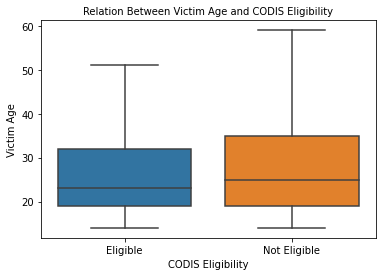

In [ ]:
#@title 
pd.options.mode.chained_assignment = None  # default='warn'
currentVariable = 'Age'
age = df[df[currentVariable] != 'No Response']
age[currentVariable] = age[currentVariable].apply(pd.to_numeric, errors='coerce')
age['CODISNDISeligibleProfile'] = np.where((age['CODISNDISeligibleProfile'] == '0'), 'Not Eligible', age['CODISNDISeligibleProfile'])
age['CODISNDISeligibleProfile'] = np.where((age['CODISNDISeligibleProfile'] == '1'), 'Eligible', age['CODISNDISeligibleProfile'])

sns.boxplot(x='CODISNDISeligibleProfile', y=currentVariable, data=age, showfliers=False)
plt.xlabel("CODIS Eligibility")
plt.ylabel("Victim Age")
plt.title("Relation Between Victim Age and CODIS Eligibility", size=10)

From this boxplot, we can easily visualize the distribution of ages within our dataset. It is evident that the average age of those with cases that developed CODIS eligiblity is less than that of those that did not. The not eligible group had far more outliers, which may contribute to what our ANOVA testing shows later. We can also see that there were cases in which the victim was significantly older than the average age, but that still developed an eligible profile. 

###Example of ANOVA and Explanation of Our Findings
Using the stats.f_oneway function, we can easily find the p-value assigned to the association between our two features. This function also returns the f-value from our model. For our purposes, we really only care about the p-value that is returned from this function. If our p-value is less than our bonferroni correction value of 1.592357e-04, we reject our null hypothesis that Age and CODISNDISeligibleProfile are not associated.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

temp = pd.DataFrame()
temp['Age'] = df['Age']
temp['CODISNDISeligibleProfile'] = df['CODISNDISeligibleProfile']
temp = temp[temp['Age'] != "No Response"] 
eligible = temp[temp['CODISNDISeligibleProfile'] == "0"] 
ineligible = temp[temp['CODISNDISeligibleProfile'] == "1"] 

fvalue, pvalue = stats.f_oneway(eligible['Age'], ineligible['Age']) #compares the means between eligible and noneligible within the given feature

print(str(pvalue) + " is less than our cutoff value.")

1.1149917597613006e-09 is less than our cutoff value.


The P-Value we obtained from our Chi-Square was less than our cutoff value, so we reject our null hypothesis. That means that we can assume that the feature DNAKitUsed is associated with the feature CODISNDISeligibleProfile. As noted before, we would probably want to take this feature and dig deeper with Pairwise testing to note which categories have the strongest pull towards obtaining this significant p-value. 